<a href="https://colab.research.google.com/github/RAGAVENDRARAO/spring-app-config/blob/main/Another_copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MEDINC      20640 non-null  float64
 1   HOUSEAGE    20640 non-null  float64
 2   AVEROOMS    20640 non-null  float64
 3   AVEBEDRMS   20640 non-null  float64
 4   POPULATION  20640 non-null  float64
 5   AVEOCCUP    20640 non-null  float64
 6   LATITUDE    20640 non-null  float64
 7   LONGITUDE   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MEDINC,HOUSEAGE,AVEROOMS,AVEBEDRMS,POPULATION,AVEOCCUP,LATITUDE,LONGITUDE,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


,0
MEDINC,0
HOUSEAGE,0
AVEROOMS,0
AVEBEDRMS,0
POPULATION,0
AVEOCCUP,0
LATITUDE,0
LONGITUDE,0
PRICE,0


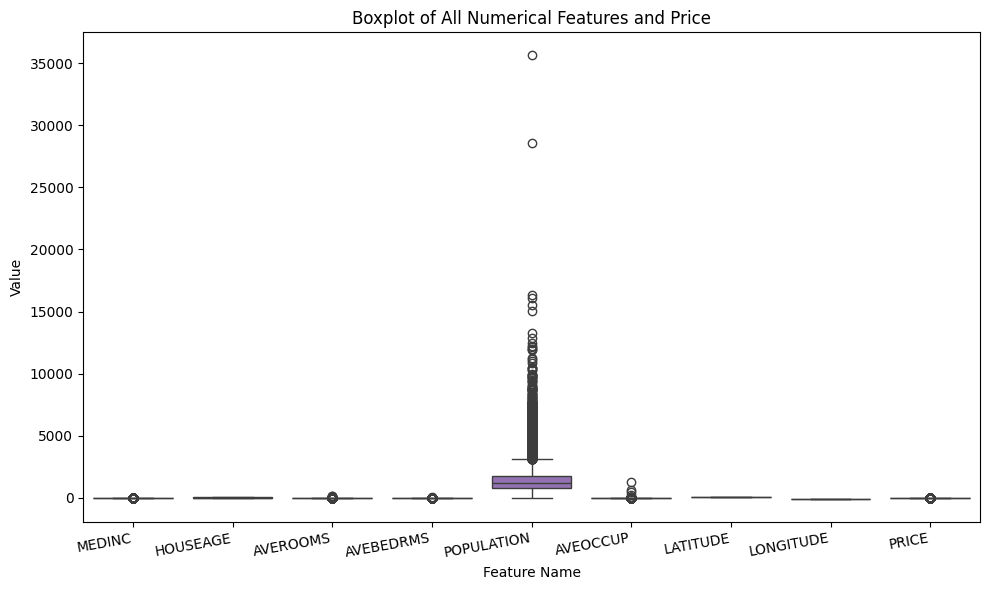

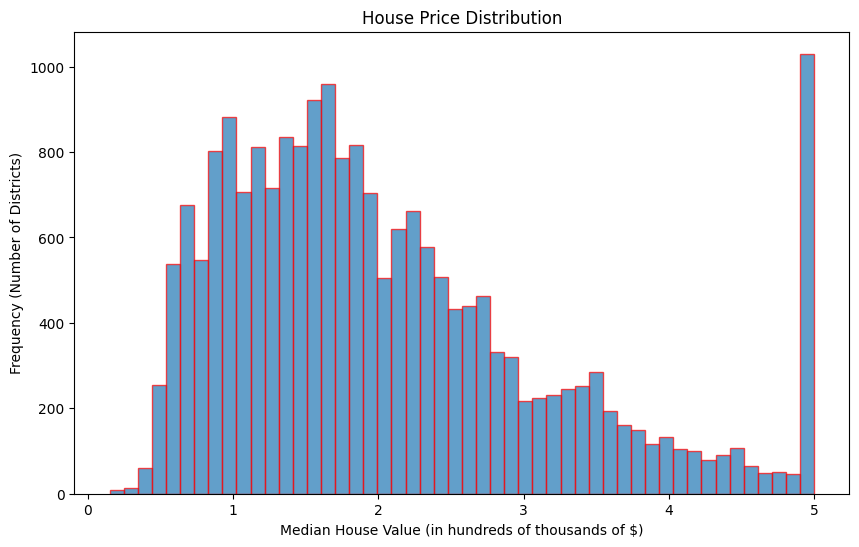

Data split. Training samples: 8256, Testing samples: 12384
X_train shape: (8256, 8)
X_test shape: (12384, 8)
Y_train shape: (8256,)
Y_test shape: (12384,)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Number',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MEDINC', 'HOUSEAGE',
                                                   'AVEROOMS', 'AVEBEDRMS',
                                                   'POPULATION', 'AVEOCCUP',
                                                   'LATITUDE', 'LONGITUDE']),
                                                 ('Category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('regressor', LinearRegression())])

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import necessary modules for Pipeline, Imputer, Scaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the California Housing dataset
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['PRICE'] = california_housing.target
data.columns = data.columns.str.upper()
data.head()
data.info()
data.describe()

display(data.head())
nullFind=data.isnull().sum()
display(nullFind)

# Assuming 'data' DataFrame is already loaded and prepared with 'PRICE' column

# --- 1. Boxplot for All Features ---
# A boxplot is best viewed when the data is long format or when using a specific size.
# For many features, setting the figure size first is helpful.
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot of All Numerical Features and Price')
plt.ylabel('Value')
plt.xlabel('Feature Name')
plt.xticks(rotation=10, ha='right') # Rotate x-labels for readability
# plt.xlim(-0.5, len(data.columns) - 0.5)
plt.tight_layout() # Adjust layout to prevent labels from being cut off

plt.show()

# --- 2. Histogram for House Price Distribution ---
plt.figure(figsize=(10, 6))
plt.hist(data['PRICE'], bins=50, edgecolor='red', alpha=0.7)

# Corrected labels
plt.title('House Price Distribution')
plt.ylabel('Frequency (Number of Districts)')
plt.xlabel('Median House Value (in hundreds of thousands of $)')
plt.show()

x=data.drop('PRICE',axis=1)
y=data['PRICE']

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.6, random_state=42)
print(f"Data split. Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"Y_test shape: {y_test.shape}")

# Define numerical and categorical columns based on the dataset
numeriCols = X_train.select_dtypes(include=np.number).columns.tolist()
categoriCols = X_train.select_dtypes(include='object').columns.tolist()

numericalTrans=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])
categoricalTrans= Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])

# Define the preprocessor before using it in the model_pipeline
preprocessor=ColumnTransformer(
    transformers=[
        ('Number',numericalTrans,numeriCols),
        ('Category',categoricalTrans,categoriCols)
    ])

model_pipeline= Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])
model_pipeline.fit(X_train, y_train)

In [20]:
mean=data['PRICE'].mean()
median=data['PRICE'].median()
mode=data['PRICE'].mode()[0]
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 2.068558169089147
Median: 1.797
Mode: 5.00001


In [21]:
std_dev = data['c'].std()
print("Standard Deviation:", std_dev)

Standard Deviation: 1.1539561587441483


In [22]:
q1=data['PRICE'].quantile(0.25)
q3=data['PRICE'].quantile(0.75)
Iqr=q3-q1
print("IQR",Iqr)

IQR 1.4512499999999997


In [33]:
lower_bound=q1-1.5*Iqr
upper_bound=q3+1.5*Iqr
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -0.9808749999999995
Upper Bound: 4.824124999999999


In [34]:
outliers = data[(data['PRICE'] < lower_bound) | (data['PRICE'] > upper_bound)]

print("\nOutliers detected in 'price' column:")
print(outliers if not outliers.empty else "No outliers found")


Outliers detected in 'price' column:
        MEDINC  HOUSEAGE  AVEROOMS  AVEBEDRMS  POPULATION  AVEOCCUP  LATITUDE  \
89      1.2434      52.0  2.929412   0.917647       396.0  4.658824     37.80   
140     6.3624      30.0  5.615385   0.730769       126.0  2.423077     37.81   
459     1.1696      52.0  2.436000   0.944000      1349.0  5.396000     37.87   
489     3.0417      48.0  4.690632   1.126362      1656.0  3.607843     37.86   
493     7.8521      52.0  7.794393   1.051402       517.0  2.415888     37.86   
...        ...       ...       ...        ...         ...       ...       ...   
20422   5.1457      35.0  6.958333   1.217593       576.0  2.666667     34.14   
20426  10.0472      11.0  9.890756   1.159664       415.0  3.487395     34.18   
20427   8.6499       4.0  7.236059   1.032528      5495.0  2.553439     34.19   
20436  12.5420      10.0  9.873315   1.102426      1179.0  3.177898     34.21   
20443   3.3438      50.0  5.342857   0.942857       130.0  3.714286    

In [35]:
from sklearn import metrics

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

# Display the metrics
print('Model Performance Metrics:')
print(f'  Mean Absolute Error (MAE): {mae:.3f}')
print(f'  Mean Squared Error (MSE): {mse:.3f}')
print(f'  Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'  R-squared (R2): {r2:.3f}')

Model Performance Metrics:
  Mean Absolute Error (MAE): 0.532
  Mean Squared Error (MSE): 0.531
  Root Mean Squared Error (RMSE): 0.728
  R-squared (R2): 0.600


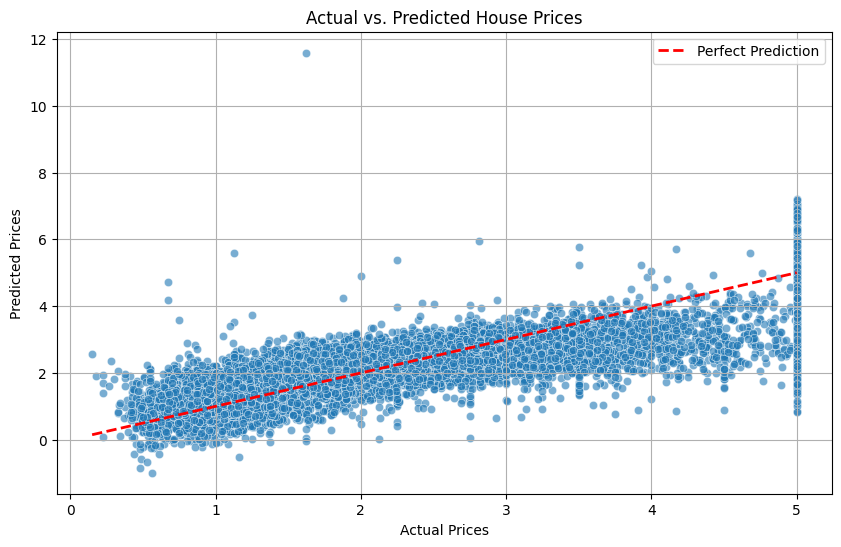

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

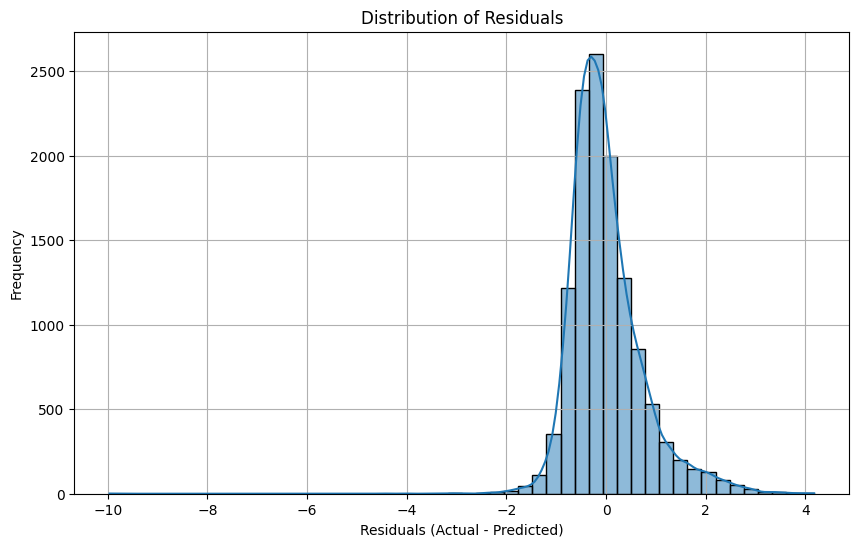

In [15]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

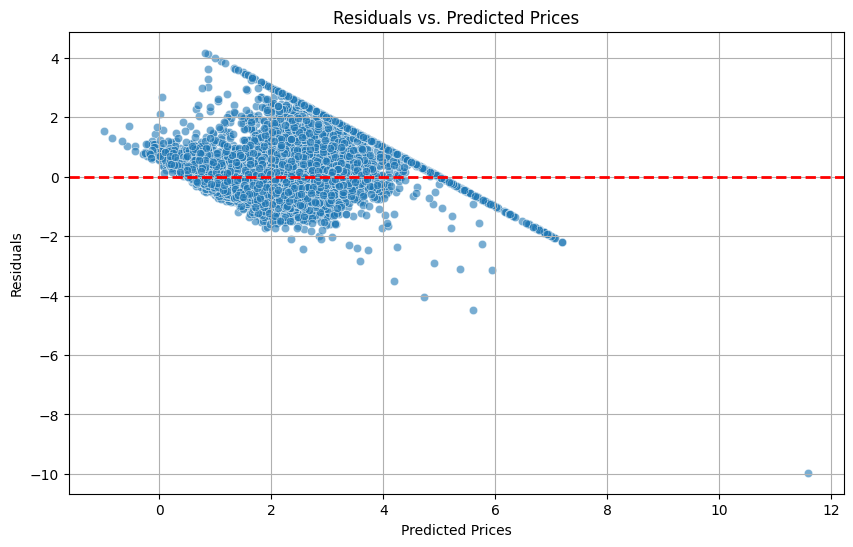

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.grid(True)
plt.show()

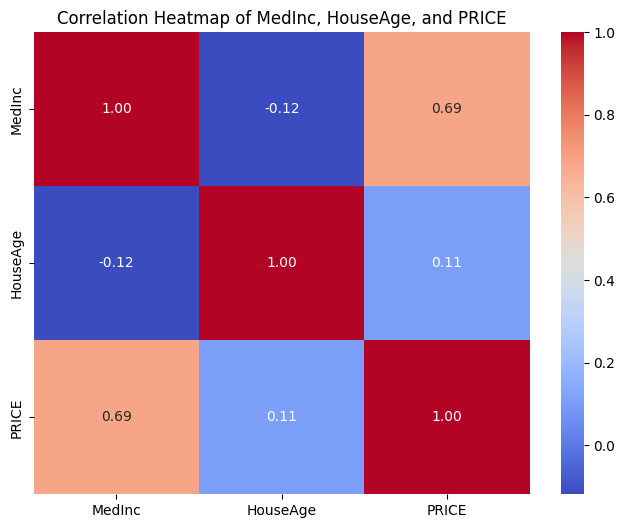

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_features = ['MedInc', 'HouseAge', 'PRICE']
correlation_matrix_subset = data[selected_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of MedInc, HouseAge, and PRICE')
plt.show()

RandomForestRegressor imported successfully.
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Number',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MEDINC', 'HOUSEAGE',
                                                   'AVEROOMS', 'AVEBEDRMS',
                                                   'POPULATION', 'AVEOCCUP',
                                                   'LATITUDE', 'LONGITUDE']),
                                                 ('Category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unk

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,0.532266,0.530538,0.728380,0.599960
1,Ridge,0.532267,0.530524,0.728371,0.599970
2,Lasso,0.909830,1.326247,1.151628,-0.000028
3,ElasticNet,0.808811,1.052722,1.026023,0.206218
4,RandomForestRegressor,0.356166,0.290097,0.538607,0.781258


/tmp/ipython-input-3779974740.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x='Model', y='Value', data=metrics_melted[metrics_melted['Metric'] == 'MAE'], palette='viridis')
/tmp/ipython-input-3779974740.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-3779974740.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x='Model', y='Value', data=metrics_melted[metrics_melted['Metric'] == 'MSE'], palette='plasma')
/tmp/ipython-input-3779974740.py:69: UserWarning: set_tickla

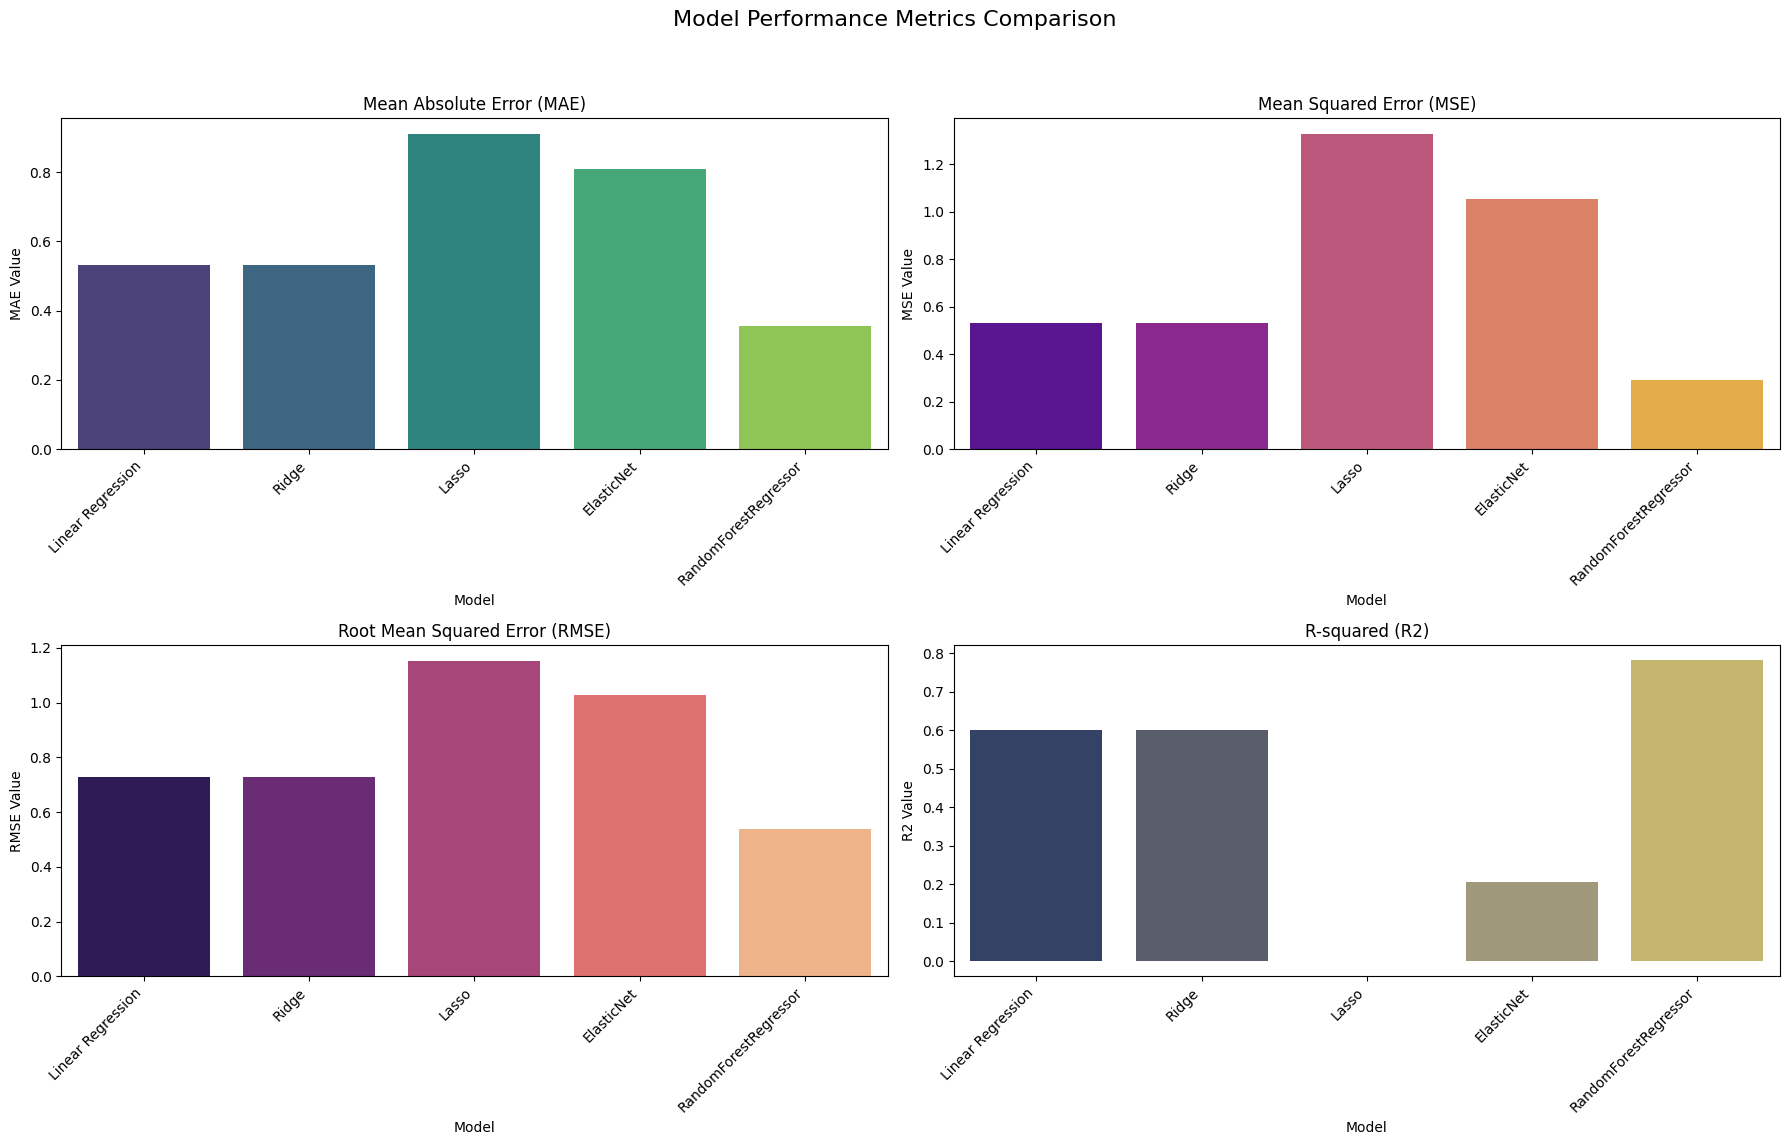

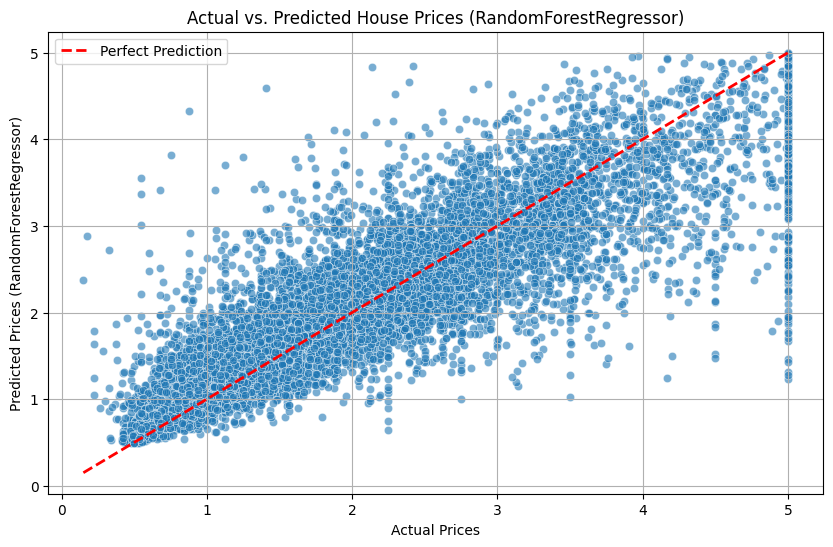

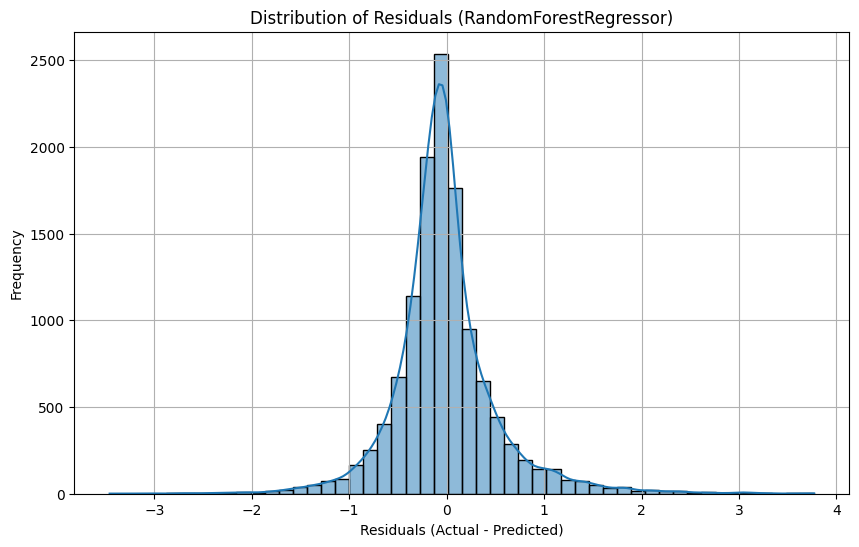

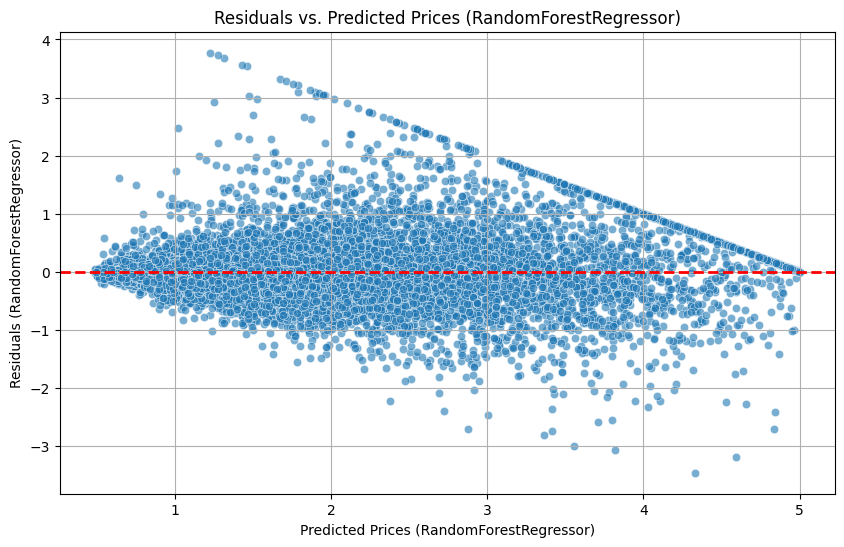

In [72]:
from sklearn.ensemble import RandomForestRegressor
print("RandomForestRegressor imported successfully.")


from sklearn.ensemble import RandomForestRegressor # Added import here for robustness

model_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42)) # Using RandomForestRegressor
])

print(model_pipeline_rf)

model_pipeline_rf.fit(X_train, y_train)
print("RandomForestRegressor pipeline trained successfully.")


y_pred_rf = model_pipeline_rf.predict(X_test)
print("Predictions made successfully with RandomForestRegressor.")


mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = metrics.r2_score(y_test, y_pred_rf)

print('RandomForestRegressor Model Performance Metrics:')
print(f'  Mean Absolute Error (MAE): {mae_rf:.3f}')
print(f'  Mean Squared Error (MSE): {mse_rf:.3f}')
print(f'  Root Mean Squared Error (RMSE): {rmse_rf:.3f}')
print(f'  R-squared (R2): {r2_rf:.3f}')





# Create a dictionary to store the metrics
metrics_data = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'RandomForestRegressor'],
    'MAE': [mae, mae_ridge, mae_lasso, mae_elasticnet, mae_rf],
    'MSE': [mse, mse_ridge, mse_lasso, mse_elasticnet, mse_rf],
    'RMSE': [rmse, rmse_ridge, rmse_lasso, rmse_elasticnet, rmse_rf],
    'R2': [r2, r2_ridge, r2_lasso, r2_elasticnet, r2_rf]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
display(metrics_df)

# Melt the DataFrame for easier plotting with seaborn
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Model Performance Metrics Comparison', fontsize=16)

# Plot MAE
sns.barplot(ax=axes[0, 0], x='Model', y='Value', data=metrics_melted[metrics_melted['Metric'] == 'MAE'], palette='viridis')
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE Value')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

# Plot MSE
sns.barplot(ax=axes[0, 1], x='Model', y='Value', data=metrics_melted[metrics_melted['Metric'] == 'MSE'], palette='plasma')
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE Value')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# Plot RMSE
sns.barplot(ax=axes[1, 0], x='Model', y='Value', data=metrics_melted[metrics_melted['Metric'] == 'RMSE'], palette='magma')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE Value')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

# Plot R2
sns.barplot(ax=axes[1, 1], x='Model', y='Value', data=metrics_melted[metrics_melted['Metric'] == 'R2'], palette='cividis')
axes[1, 1].set_title('R-squared (R2)')
axes[1, 1].set_ylabel('R2 Value')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap
plt.show()



plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (RandomForestRegressor)')
plt.title('Actual vs. Predicted House Prices (RandomForestRegressor)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Calculate residuals for RandomForestRegressor
residuals_rf = y_test - y_pred_rf


plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, bins=50, kde=True)
plt.title('Distribution of Residuals (RandomForestRegressor)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Prices (RandomForestRegressor)')
plt.ylabel('Residuals (RandomForestRegressor)')
plt.title('Residuals vs. Predicted Prices (RandomForestRegressor)')
plt.grid(True)
plt.show()

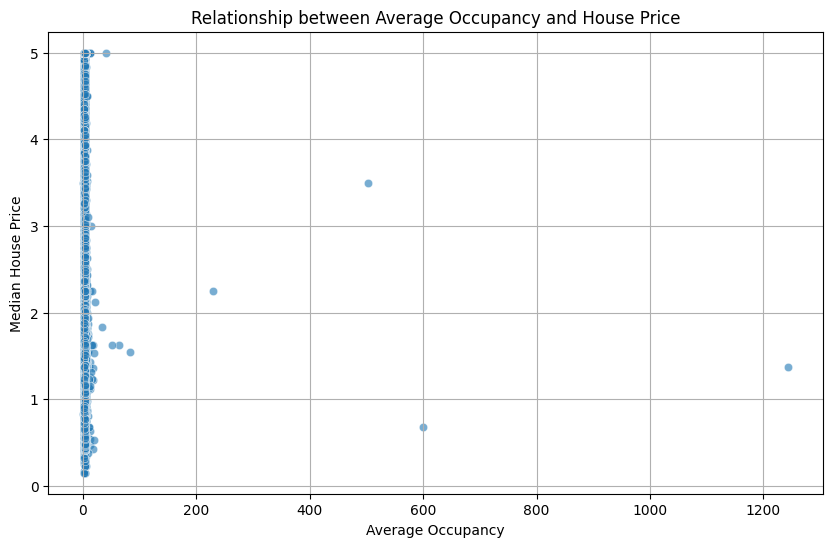

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AveOccup', y='PRICE', data=data, alpha=0.6)
plt.title('Relationship between Average Occupancy and House Price')
plt.xlabel('Average Occupancy')
plt.ylabel('Median House Price')
plt.grid(True)
plt.show()

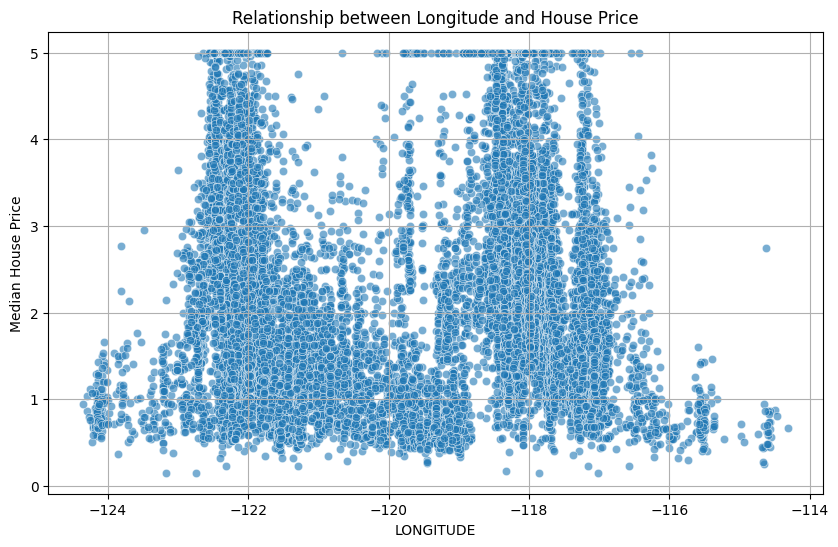

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUDE', y='PRICE', data=data, alpha=0.6)
plt.title('Relationship between Longitude and House Price')
plt.xlabel('LONGITUDE')
plt.ylabel('Median House Price')
plt.grid(True)
plt.show()

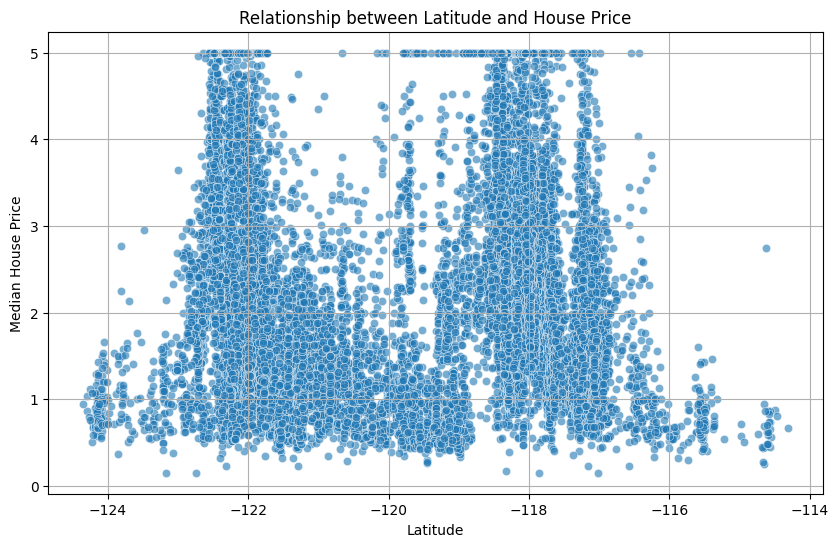

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUDE', y='PRICE', data=data, alpha=0.6)
plt.title('Relationship between Latitude and House Price')
plt.xlabel('Latitude')
plt.ylabel('Median House Price')
plt.grid(True)
plt.show()

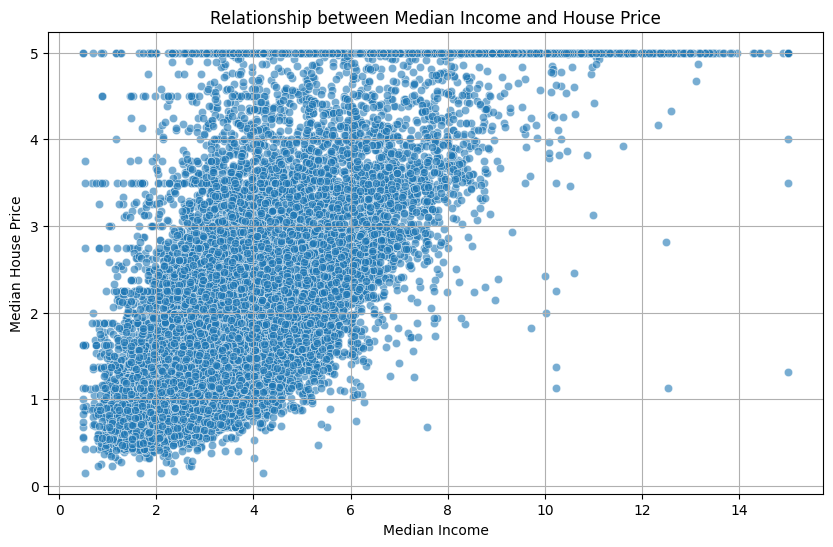

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MEDINC', y='PRICE', data=data, alpha=0.6)
plt.title('Relationship between Median Income and House Price')
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.grid(True)
plt.show()

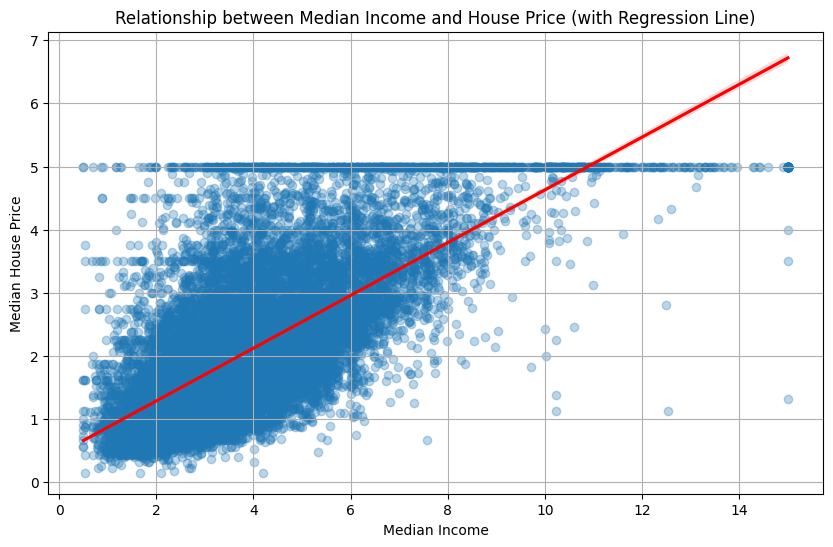

In [55]:
plt.figure(figsize=(10, 6))
sns.regplot(x='MEDINC', y='PRICE', data=data, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relationship between Median Income and House Price (with Regression Line)')
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.grid(True)
plt.show()

/tmp/ipython-input-3590176686.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf, palette='viridis')


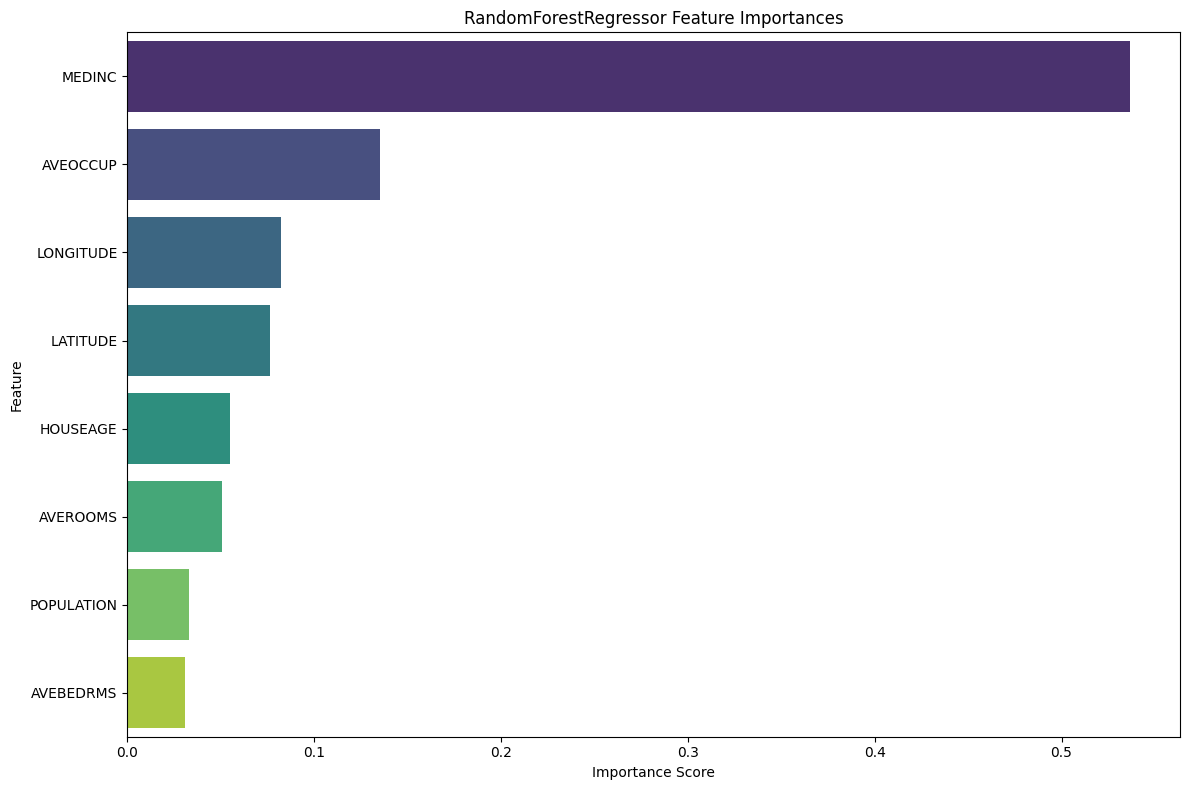

,Feature,Importance
0,MEDINC,0.536590
5,AVEOCCUP,0.135200
7,LONGITUDE,0.082118
6,LATITUDE,0.076519
1,HOUSEAGE,0.055235
2,AVEROOMS,0.050651
4,POPULATION,0.032837
3,AVEBEDRMS,0.030850


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the RandomForestRegressor model
# The preprocessor step will transform the features, so we need to get the feature names after transformation
# However, RandomForestRegressor.feature_importances_ already corresponds to the features fed into it.
# Since we only have numerical features, the feature names are simply numeriCols after scaling.

feature_importances_rf = model_pipeline_rf.named_steps['regressor'].feature_importances_

# Create a DataFrame for better visualization
feature_importance_df_rf = pd.DataFrame({
    'Feature': numeriCols, # Using numeriCols as they are the direct features after preprocessing for this dataset
    'Importance': feature_importances_rf
})

# Sort by importance
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf, palette='viridis')
plt.title('RandomForestRegressor Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

display(feature_importance_df_rf)

In [57]:
y_pred = model_pipeline.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print('--- Linear Models Performance Comparison ---')
print(f'{'Metric':<25} {'Linear Regression':<20} {'Ridge':<10} {'Lasso':<10} {'ElasticNet':<15}')
print(f'{'Mean Absolute Error (MAE):':<25} {mae:<20.3f} {mae_ridge:<10.3f} {mae_lasso:<10.3f} {mae_elasticnet:<15.3f}')
print(f'{'Mean Squared Error (MSE):':<25} {mse:<20.3f} {mse_ridge:<10.3f} {mse_lasso:<10.3f} {mse_elasticnet:<15.3f}')
print(f'{'Root Mean Squared Error (RMSE):':<25} {rmse:<20.3f} {rmse_ridge:<10.3f} {rmse_lasso:<10.3f} {rmse_elasticnet:<15.3f}')
print(f'{'R-squared (R2):':<25} {r2:<20.3f} {r2_ridge:<10.3f} {r2_lasso:<10.3f} {r2_elasticnet:<15.3f}')

--- Linear Models Performance Comparison ---
Metric                    Linear Regression    Ridge      Lasso      ElasticNet     
Mean Absolute Error (MAE): 0.532                0.532      0.910      0.809          
Mean Squared Error (MSE): 0.531                0.531      1.326      1.053          
Root Mean Squared Error (RMSE): 0.728                0.728      1.152      1.026          
R-squared (R2):           0.600                0.600      -0.000     0.206          


In [58]:
y_pred = model_pipeline.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print('--- Linear Models Performance Comparison ---')
print(f'{'Metric':<25} {'Linear Regression':<20} {'Ridge':<10} {'Lasso':<10} {'ElasticNet':<15}')
print(f'{'Mean Absolute Error (MAE):':<25} {mae:<20.3f} {mae_ridge:<10.3f} {mae_lasso:<10.3f} {mae_elasticnet:<15.3f}')
print(f'{'Mean Squared Error (MSE):':<25} {mse:<20.3f} {mse_ridge:<10.3f} {mse_lasso:<10.3f} {mse_elasticnet:<15.3f}')
print(f'{'Root Mean Squared Error (RMSE):':<25} {rmse:<20.3f} {rmse_ridge:<10.3f} {rmse_lasso:<10.3f} {rmse_elasticnet:<15.3f}')
print(f'{'R-squared (R2):':<25} {r2:<20.3f} {r2_ridge:<10.3f} {r2_lasso:<10.3f} {r2_elasticnet:<15.3f}')

--- Linear Models Performance Comparison ---
Metric                    Linear Regression    Ridge      Lasso      ElasticNet     
Mean Absolute Error (MAE): 0.532                0.532      0.910      0.809          
Mean Squared Error (MSE): 0.531                0.531      1.326      1.053          
Root Mean Squared Error (RMSE): 0.728                0.728      1.152      1.026          
R-squared (R2):           0.600                0.600      -0.000     0.206          


In [59]:
y_pred = model_pipeline.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print('--- Linear Models Performance Comparison ---')
print(f'{'Metric':<25} {'Linear Regression':<20} {'Ridge':<10} {'Lasso':<10} {'ElasticNet':<15}')
print(f'{'Mean Absolute Error (MAE):':<25} {mae:<20.3f} {mae_ridge:<10.3f} {mae_lasso:<10.3f} {mae_elasticnet:<15.3f}')
print(f'{'Mean Squared Error (MSE):':<25} {mse:<20.3f} {mse_ridge:<10.3f} {mse_lasso:<10.3f} {mse_elasticnet:<15.3f}')
print(f'{'Root Mean Squared Error (RMSE):':<25} {rmse:<20.3f} {rmse_ridge:<10.3f} {rmse_lasso:<10.3f} {rmse_elasticnet:<15.3f}')
print(f'{'R-squared (R2):':<25} {r2:<20.3f} {r2_ridge:<10.3f} {r2_lasso:<10.3f} {r2_elasticnet:<15.3f}')

--- Linear Models Performance Comparison ---
Metric                    Linear Regression    Ridge      Lasso      ElasticNet     
Mean Absolute Error (MAE): 0.532                0.532      0.910      0.809          
Mean Squared Error (MSE): 0.531                0.531      1.326      1.053          
Root Mean Squared Error (RMSE): 0.728                0.728      1.152      1.026          
R-squared (R2):           0.600                0.600      -0.000     0.206          


In [60]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
print("Ridge, Lasso, and ElasticNet imported successfully.")

Ridge, Lasso, and ElasticNet imported successfully.


In [61]:
model_pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

model_pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

model_pipeline_elasticnet = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(random_state=42))
])

print("Ridge Pipeline:")
print(model_pipeline_ridge)
print("\nLasso Pipeline:")
print(model_pipeline_lasso)
print("\nElasticNet Pipeline:")
print(model_pipeline_elasticnet)

Ridge Pipeline:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Number',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MEDINC', 'HOUSEAGE',
                                                   'AVEROOMS', 'AVEBEDRMS',
                                                   'POPULATION', 'AVEOCCUP',
                                                   'LATITUDE', 'LONGITUDE']),
                                                 ('Category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
          

In [62]:
model_pipeline_ridge.fit(X_train, y_train)
print("Ridge pipeline trained successfully.")

model_pipeline_lasso.fit(X_train, y_train)
print("Lasso pipeline trained successfully.")

model_pipeline_elasticnet.fit(X_train, y_train)
print("ElasticNet pipeline trained successfully.")

Ridge pipeline trained successfully.
Lasso pipeline trained successfully.
ElasticNet pipeline trained successfully.


In [63]:
y_pred_ridge = model_pipeline_ridge.predict(X_test)
print("Predictions made successfully with Ridge model.")

y_pred_lasso = model_pipeline_lasso.predict(X_test)
print("Predictions made successfully with Lasso model.")

y_pred_elasticnet = model_pipeline_elasticnet.predict(X_test)
print("Predictions made successfully with ElasticNet model.")

Predictions made successfully with Ridge model.
Predictions made successfully with Lasso model.
Predictions made successfully with ElasticNet model.


In [43]:
from sklearn import metrics

# Ridge Model Metrics
mae_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = metrics.mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = metrics.r2_score(y_test, y_pred_ridge)

print('Ridge Model Performance Metrics:')
print(f'  Mean Absolute Error (MAE): {mae_ridge:.3f}')
print(f'  Mean Squared Error (MSE): {mse_ridge:.3f}')
print(f'  Root Mean Squared Error (RMSE): {rmse_ridge:.3f}')
print(f'  R-squared (R2): {r2_ridge:.3f}')

# Lasso Model Metrics
mae_lasso = metrics.mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = metrics.mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = metrics.r2_score(y_test, y_pred_lasso)

print('\nLasso Model Performance Metrics:')
print(f'  Mean Absolute Error (MAE): {mae_lasso:.3f}')
print(f'  Mean Squared Error (MSE): {mse_lasso:.3f}')
print(f'  Root Mean Squared Error (RMSE): {rmse_lasso:.3f}')
print(f'  R-squared (R2): {r2_lasso:.3f}')

# ElasticNet Model Metrics
mae_elasticnet = metrics.mean_absolute_error(y_test, y_pred_elasticnet)
mse_elasticnet = metrics.mean_squared_error(y_test, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)
r2_elasticnet = metrics.r2_score(y_test, y_pred_elasticnet)

print('\nElasticNet Model Performance Metrics:')
print(f'  Mean Absolute Error (MAE): {mae_elasticnet:.3f}')
print(f'  Mean Squared Error (MSE): {mse_elasticnet:.3f}')
print(f'  Root Mean Squared Error (RMSE): {rmse_elasticnet:.3f}')
print(f'  R-squared (R2): {r2_elasticnet:.3f}')

Ridge Model Performance Metrics:
  Mean Absolute Error (MAE): 0.532
  Mean Squared Error (MSE): 0.531
  Root Mean Squared Error (RMSE): 0.728
  R-squared (R2): 0.600

Lasso Model Performance Metrics:
  Mean Absolute Error (MAE): 0.910
  Mean Squared Error (MSE): 1.326
  Root Mean Squared Error (RMSE): 1.152
  R-squared (R2): -0.000

ElasticNet Model Performance Metrics:
  Mean Absolute Error (MAE): 0.809
  Mean Squared Error (MSE): 1.053
  Root Mean Squared Error (RMSE): 1.026
  R-squared (R2): 0.206


In [64]:
print('--- All Models Performance Comparison ---')
print(f'{'Metric':<25} {'Linear Regression':<20} {'Ridge':<10} {'Lasso':<10} {'ElasticNet':<15} {'RandomForestRegressor':<25}')
print(f'{'Mean Absolute Error (MAE):':<25} {mae:<20.3f} {mae_ridge:<10.3f} {mae_lasso:<10.3f} {mae_elasticnet:<15.3f} {mae_rf:<25.3f}')
print(f'{'Mean Squared Error (MSE):':<25} {mse:<20.3f} {mse_ridge:<10.3f} {mse_lasso:<10.3f} {mse_elasticnet:<15.3f} {mse_rf:<25.3f}')
print(f'{'Root Mean Squared Error (RMSE):':<25} {rmse:<20.3f} {rmse_ridge:<10.3f} {rmse_lasso:<10.3f} {rmse_elasticnet:<15.3f} {rmse_rf:<25.3f}')
print(f'{'R-squared (R2):':<25} {r2:<20.3f} {r2_ridge:<10.3f} {r2_lasso:<10.3f} {r2_elasticnet:<15.3f} {r2_rf:<25.3f}')

--- All Models Performance Comparison ---
Metric                    Linear Regression    Ridge      Lasso      ElasticNet      RandomForestRegressor    
Mean Absolute Error (MAE): 0.532                0.532      0.910      0.809           0.356                    
Mean Squared Error (MSE): 0.531                0.531      1.326      1.053           0.290                    
Root Mean Squared Error (RMSE): 0.728                0.728      1.152      1.026           0.539                    
R-squared (R2):           0.600                0.600      -0.000     0.206           0.781                    


In [65]:
residuals_rf = y_test - y_pred_rf
print("RandomForestRegressor residuals calculated successfully.")

RandomForestRegressor residuals calculated successfully.


In [66]:
print('--- Model Performance Comparison ---')
print(f'{'Metric':<25} {'Linear Regression':<20} {'RandomForestRegressor':<25}')
print(f'{'Mean Absolute Error (MAE):':<25} {mae:<20.3f} {mae_rf:<25.3f}')
print(f'{'Mean Squared Error (MSE):':<25} {mse:<20.3f} {mse_rf:<25.3f}')
print(f'{'Root Mean Squared Error (RMSE):':<25} {rmse:<20.3f} {rmse_rf:<25.3f}')
print(f'{'R-squared (R2):':<25} {r2:<20.3f} {r2_rf:<25.3f}')

--- Model Performance Comparison ---
Metric                    Linear Regression    RandomForestRegressor    
Mean Absolute Error (MAE): 0.532                0.356                    
Mean Squared Error (MSE): 0.531                0.290                    
Root Mean Squared Error (RMSE): 0.728                0.539                    
R-squared (R2):           0.600                0.781                    


In [67]:
model_pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

model_pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

model_pipeline_elasticnet = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(random_state=42))
])

print("Ridge Pipeline:")
print(model_pipeline_ridge)
print("\nLasso Pipeline:")
print(model_pipeline_lasso)
print("\nElasticNet Pipeline:")
print(model_pipeline_elasticnet)

Ridge Pipeline:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Number',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MEDINC', 'HOUSEAGE',
                                                   'AVEROOMS', 'AVEBEDRMS',
                                                   'POPULATION', 'AVEOCCUP',
                                                   'LATITUDE', 'LONGITUDE']),
                                                 ('Category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
          

In [68]:
model_pipeline_ridge.fit(X_train, y_train)
print("Ridge pipeline trained successfully.")

model_pipeline_lasso.fit(X_train, y_train)
print("Lasso pipeline trained successfully.")

model_pipeline_elasticnet.fit(X_train, y_train)
print("ElasticNet pipeline trained successfully.")

Ridge pipeline trained successfully.
Lasso pipeline trained successfully.
ElasticNet pipeline trained successfully.


In [69]:
y_pred_ridge = model_pipeline_ridge.predict(X_test)
print("Predictions made successfully with Ridge model.")

y_pred_lasso = model_pipeline_lasso.predict(X_test)
print("Predictions made successfully with Lasso model.")

y_pred_elasticnet = model_pipeline_elasticnet.predict(X_test)
print("Predictions made successfully with ElasticNet model.")

Predictions made successfully with Ridge model.
Predictions made successfully with Lasso model.
Predictions made successfully with ElasticNet model.


In [70]:
from sklearn import metrics

# Ridge Model Metrics
mae_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = metrics.mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = metrics.r2_score(y_test, y_pred_ridge)

print('Ridge Model Performance Metrics:')
print(f'  Mean Absolute Error (MAE): {mae_ridge:.3f}')
print(f'  Mean Squared Error (MSE): {mse_ridge:.3f}')
print(f'  Root Mean Squared Error (RMSE): {rmse_ridge:.3f}')
print(f'  R-squared (R2): {r2_ridge:.3f}')

# Lasso Model Metrics
mae_lasso = metrics.mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = metrics.mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = metrics.r2_score(y_test, y_pred_lasso)

print('\nLasso Model Performance Metrics:')
print(f'  Mean Absolute Error (MAE): {mae_lasso:.3f}')
print(f'  Mean Squared Error (MSE): {mse_lasso:.3f}')
print(f'  Root Mean Squared Error (RMSE): {rmse_lasso:.3f}')
print(f'  R-squared (R2): {r2_lasso:.3f}')

# ElasticNet Model Metrics
mae_elasticnet = metrics.mean_absolute_error(y_test, y_pred_elasticnet)
mse_elasticnet = metrics.mean_squared_error(y_test, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)
r2_elasticnet = metrics.r2_score(y_test, y_pred_elasticnet)

print('\nElasticNet Model Performance Metrics:')
print(f'  Mean Absolute Error (MAE): {mae_elasticnet:.3f}')
print(f'  Mean Squared Error (MSE): {mse_elasticnet:.3f}')
print(f'  Root Mean Squared Error (RMSE): {rmse_elasticnet:.3f}')
print(f'  R-squared (R2): {r2_elasticnet:.3f}')

Ridge Model Performance Metrics:
  Mean Absolute Error (MAE): 0.532
  Mean Squared Error (MSE): 0.531
  Root Mean Squared Error (RMSE): 0.728
  R-squared (R2): 0.600

Lasso Model Performance Metrics:
  Mean Absolute Error (MAE): 0.910
  Mean Squared Error (MSE): 1.326
  Root Mean Squared Error (RMSE): 1.152
  R-squared (R2): -0.000

ElasticNet Model Performance Metrics:
  Mean Absolute Error (MAE): 0.809
  Mean Squared Error (MSE): 1.053
  Root Mean Squared Error (RMSE): 1.026
  R-squared (R2): 0.206


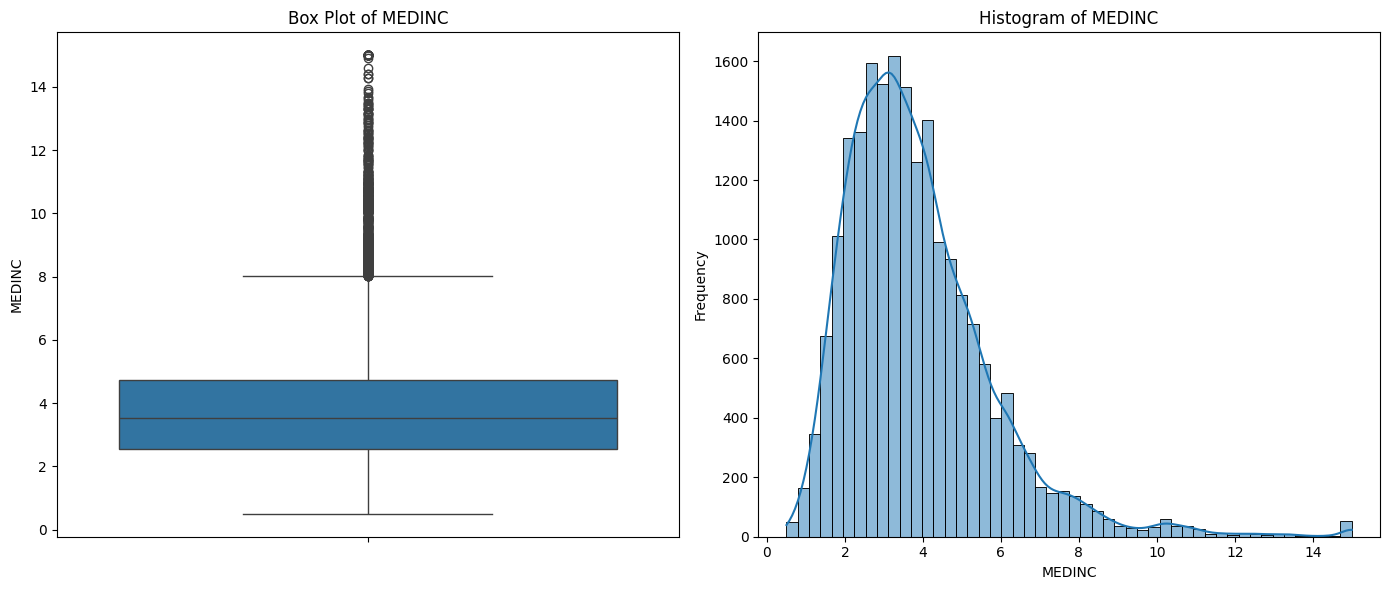

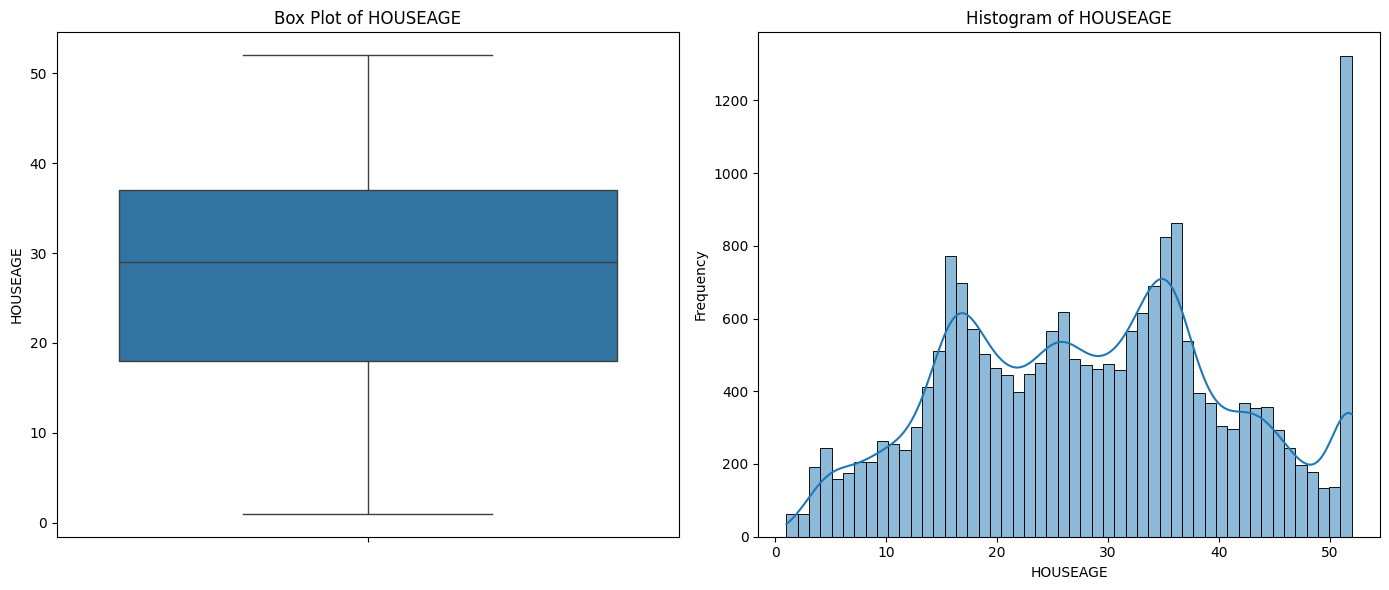

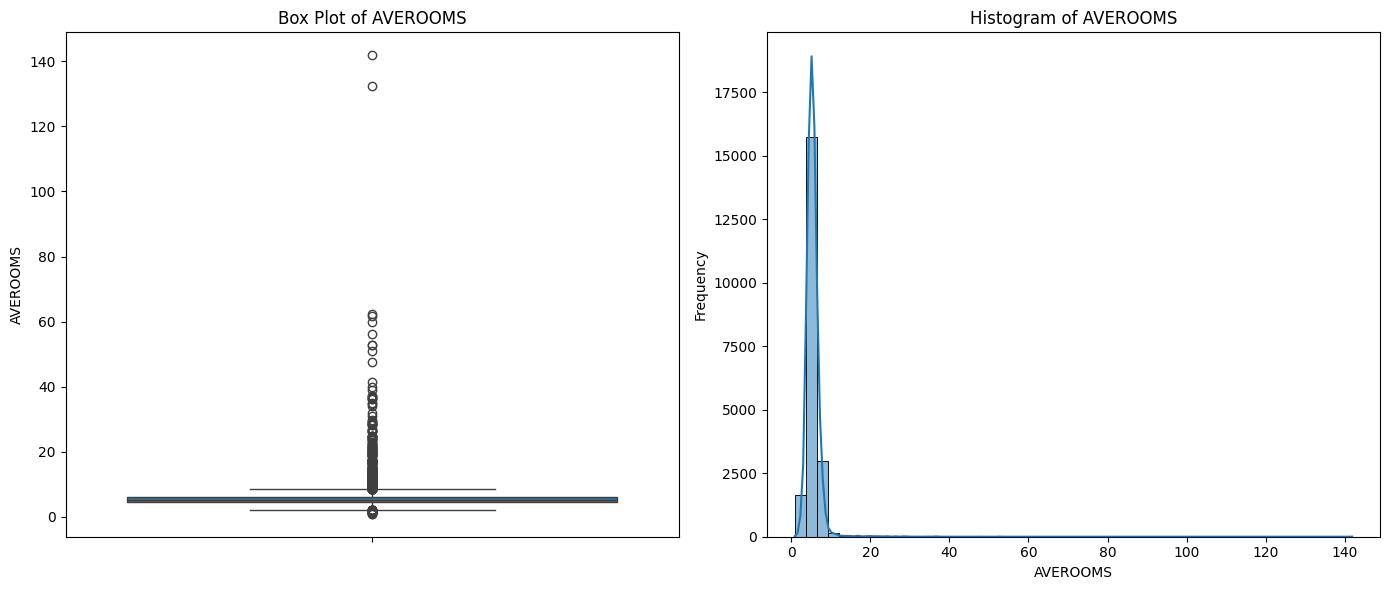

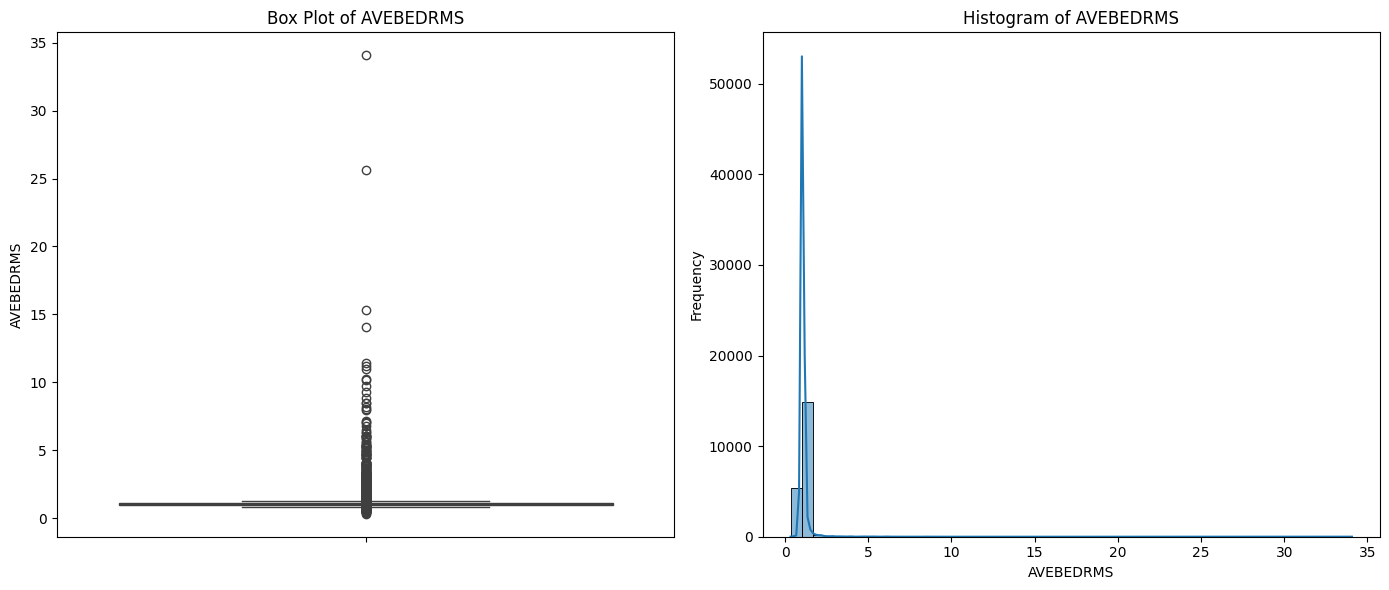

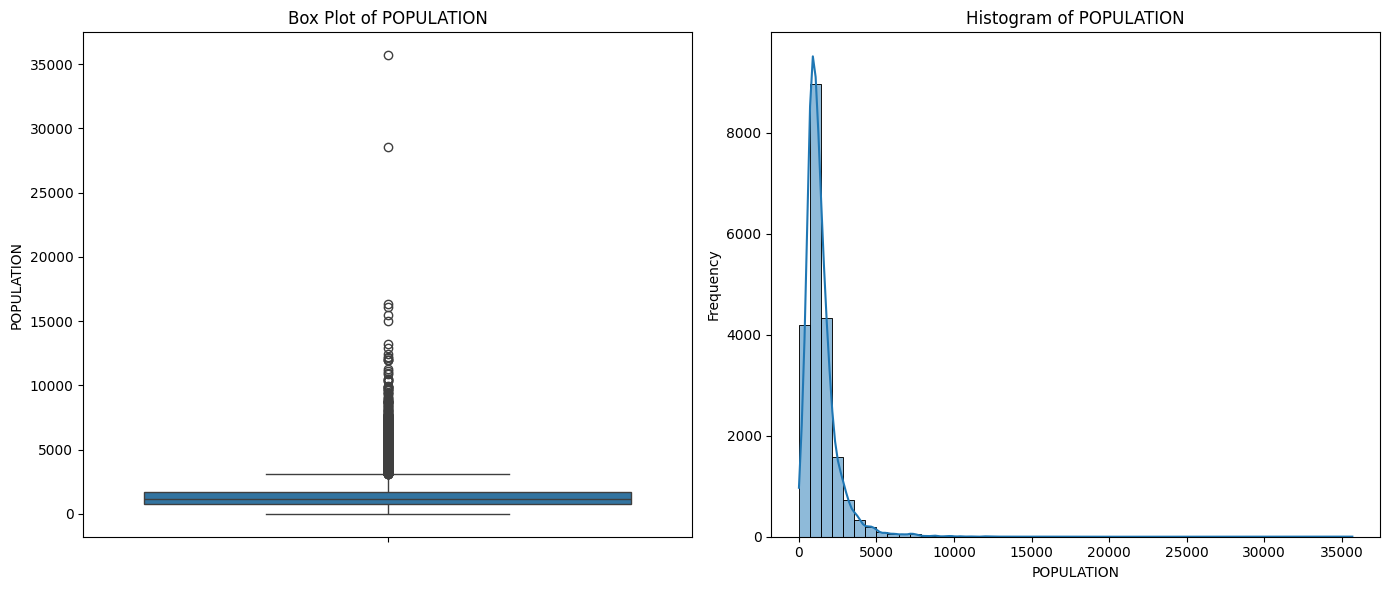

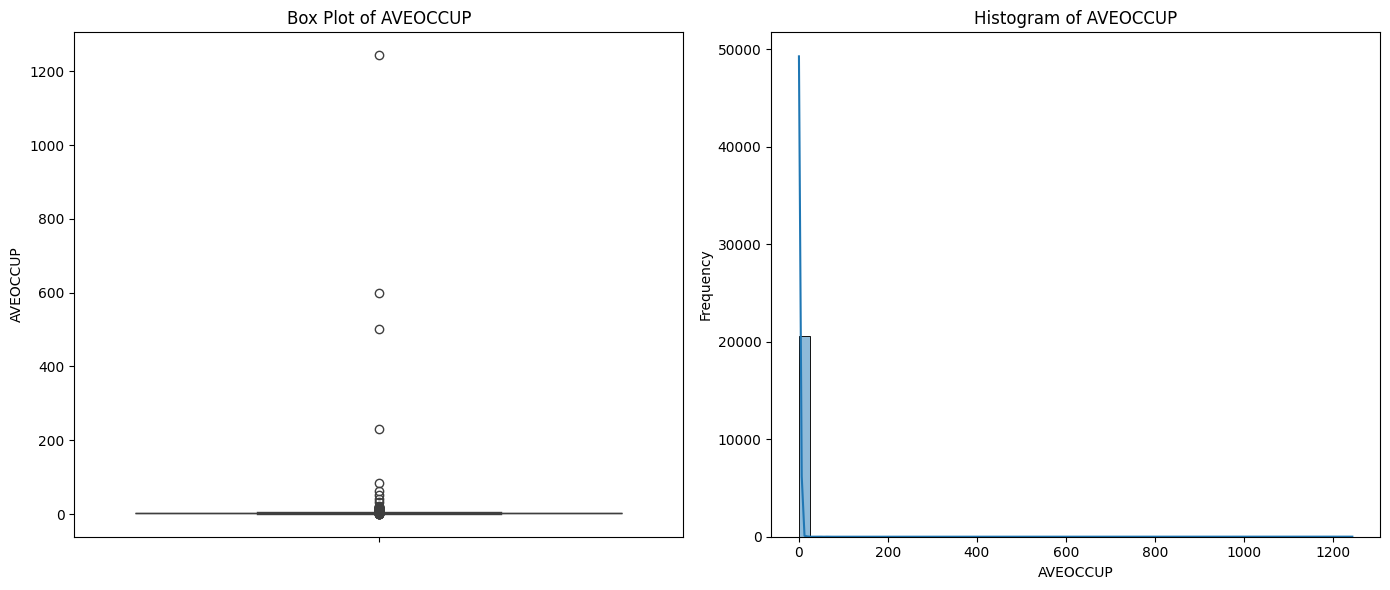

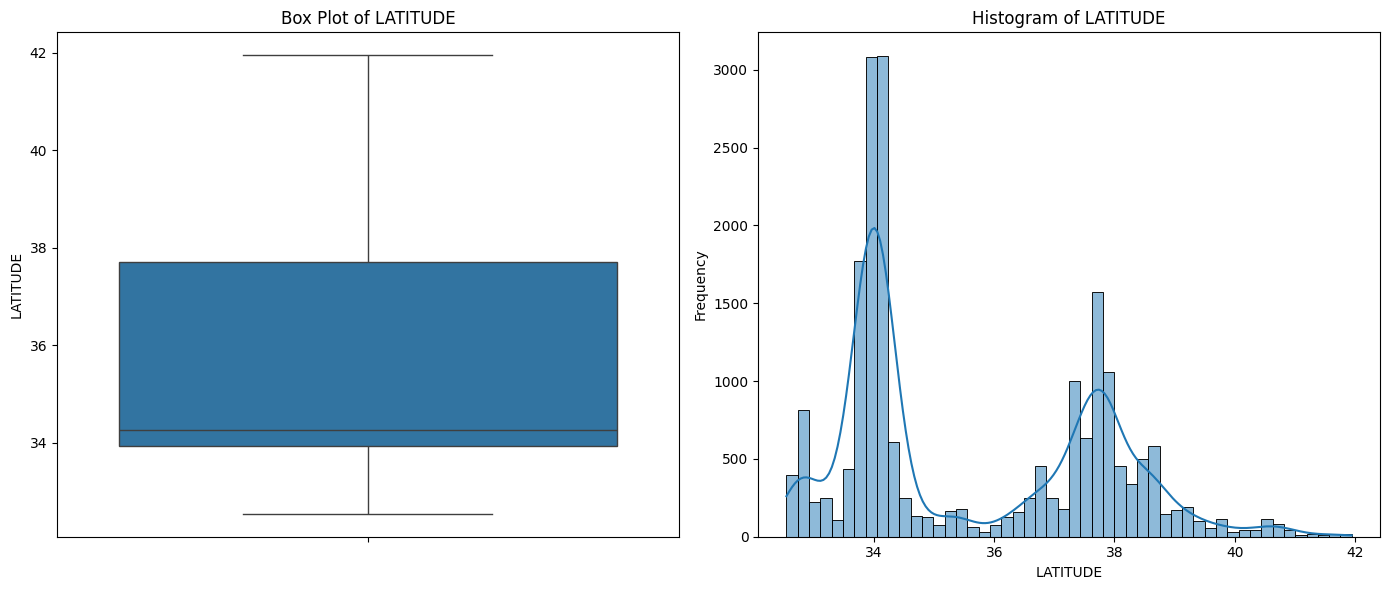

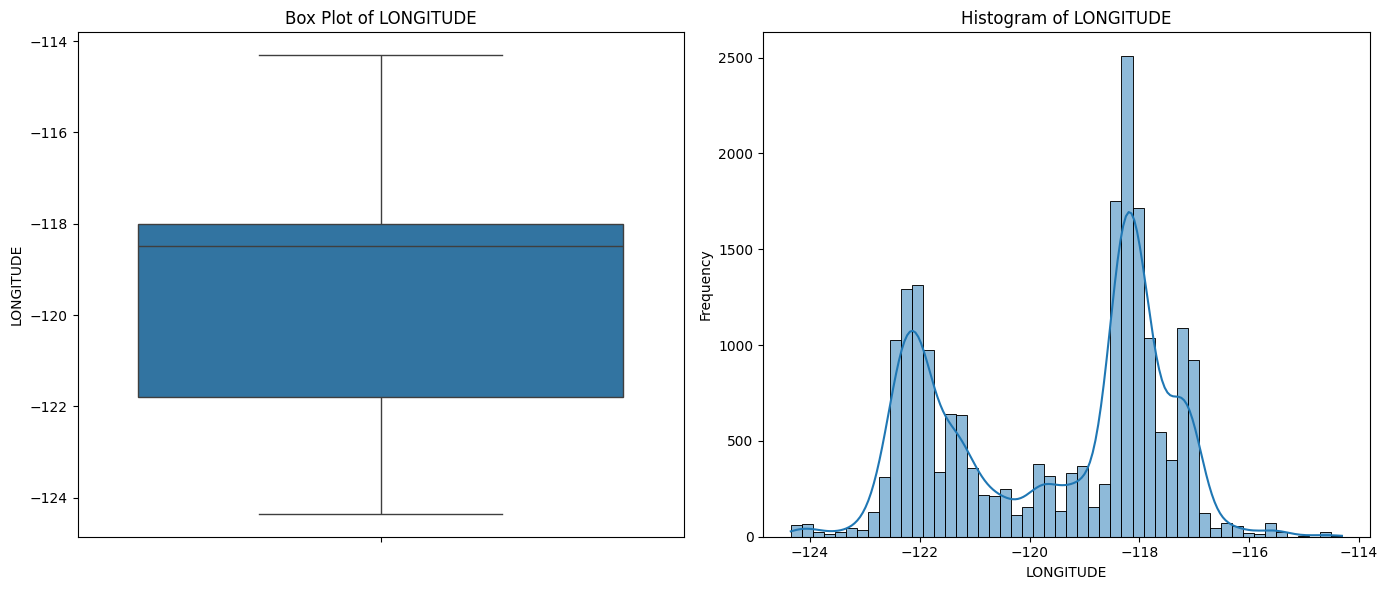

In [71]:
numerical_features = data.select_dtypes(include=np.number).columns.tolist()
if 'PRICE' in numerical_features:
    numerical_features.remove('PRICE')

for feature in numerical_features:
    plt.figure(figsize=(14, 6))

    # Box Plot
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    sns.boxplot(y=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

    # Histogram
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    sns.histplot(data[feature], bins=50, kde=True, edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

**Reasoning**:
The previous code failed because the `data` DataFrame was not defined in the current execution scope. I need to re-import necessary libraries and reload the `california_housing` dataset into the `data` DataFrame to ensure it's available for plotting.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Reload the dataset to ensure 'data' DataFrame is defined
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['PRICE'] = california_housing.target

numerical_features = data.select_dtypes(include=np.number).columns.tolist()
if 'PRICE' in numerical_features:
    numerical_features.remove('PRICE')

for feature in numerical_features:
    plt.figure(figsize=(14, 6))

    # Box Plot
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    sns.boxplot(y=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

    # Histogram
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    sns.histplot(data[feature], bins=50, kde=True, edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

### Summary of Feature Distributions and Outlier Analysis

After generating individual box plots and histograms for each numerical feature (excluding 'PRICE'), the following observations can be made:

*   **MedInc (Median Income):**
    *   **Distribution:** Right-skewed, with a concentration of values at lower incomes and a long tail extending towards higher incomes.
    *   **Outliers:** Several outliers are visible on the box plot, indicating districts with significantly higher median incomes than the majority.

*   **HouseAge (Median House Age):**
    *   **Distribution:** Appears somewhat bimodal or multi-modal, with peaks at younger and older house ages. It covers the full range from new to very old properties.
    *   **Outliers:** Few explicit outliers are seen on the higher end, indicating some extremely old properties, but the distribution itself is quite spread.

*   **AveRooms (Average Number of Rooms):**
    *   **Distribution:** Right-skewed, with a large number of districts having a moderate average number of rooms and a long tail for districts with very high average room counts.
    *   **Outliers:** Numerous outliers are present on the higher side, representing districts with unusually large average room numbers per household.

*   **AveBedrms (Average Number of Bedrooms):**
    *   **Distribution:** Similar to AveRooms, it's right-skewed. The distribution is generally centered around 1 bedroom per room (given AveRooms values), but with many higher values.
    *   **Outliers:** Many outliers are observed on the higher end, indicating districts with a much higher average number of bedrooms per household.

*   **Population:**
    *   **Distribution:** Highly right-skewed, with most districts having a small population and a few districts having very large populations.
    *   **Outliers:** Significant number of extreme outliers on the higher end, corresponding to densely populated districts or larger geographical areas.

*   **AveOccup (Average Household Occupancy):**
    *   **Distribution:** Heavily right-skewed, with most households having 2-3 occupants, but a very long tail indicating districts with extremely high average occupancy.
    *   **Outliers:** Numerous extreme outliers exist, showing districts with exceptionally high average household occupancy, which could indicate unusual living arrangements or data collection anomalies.

*   **Latitude and Longitude:**
    *   **Distribution:** Both show multi-modal distributions, reflecting the geographical spread of housing districts across California. These are not typically 'skewed' in the same sense as other features, but rather represent clusters of data points.
    *   **Outliers:** No clear outliers in terms of extreme values that would be problematic. The data points largely fall within the expected geographical bounds of California.

**Overall Observations:**

*   Most numerical features (`MedInc`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`) exhibit a **right-skewed distribution**, implying a concentration of lower values and a presence of higher, less frequent values. This is common in real-world data like income and population.
*   The presence of **numerous outliers** in features like `MedInc`, `AveRooms`, `AveBedrms`, `Population`, and `AveOccup` is significant. These outliers could represent unique housing characteristics or demographic patterns (e.g., luxury homes, large apartment complexes, specific community types).
*   Features like `HouseAge`, `Latitude`, and `Longitude` tend to have more spread-out or clustered distributions without as many extreme outliers, reflecting their nature as age and geographical indicators.

These insights are crucial for understanding the data's characteristics and can inform decisions on potential data transformations (e.g., log transformation for skewed features) or outlier handling strategies if necessary for specific modeling approaches.

## Final Task

### Subtask:
Summarize the findings from the outlier analysis and distribution visualizations for all features, highlighting any significant observations.


## Summary:

### Data Analysis Key Findings

*   **Right-Skewed Distributions & Outliers:** Most numerical features—`MedInc` (Median Income), `AveRooms` (Average Number of Rooms), `AveBedrms` (Average Number of Bedrooms), `Population`, and `AveOccup` (Average Household Occupancy)—exhibit a right-skewed distribution. This indicates a concentration of lower values and a long tail extending to higher, less frequent values. These features also contain numerous outliers, particularly on the higher end, suggesting unusually large values (e.g., very high incomes, large average room counts, or dense populations).
*   **Multi-Modal Distributions:** `HouseAge` (Median House Age) shows a somewhat bimodal or multi-modal distribution, covering a full range from new to very old properties, with few explicit outliers. `Latitude` and `Longitude` also display multi-modal distributions, reflecting geographical clusters within California, with no significant outliers.
*   **Specific Outlier Presence:**
    *   `MedInc`: Outliers indicate districts with significantly higher median incomes.
    *   `AveRooms` & `AveBedrms`: Many outliers represent districts with unusually high average room/bedroom numbers per household.
    *   `Population` & `AveOccup`: Significant extreme outliers correspond to densely populated districts or areas with exceptionally high average household occupancy.

### Insights or Next Steps

*   **Data Preprocessing for Modeling:** The prevalent right-skewness and numerous outliers in key features (`MedInc`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`) suggest that data transformations (e.g., logarithmic transformation) or robust scaling methods might be necessary before applying certain machine learning models to improve model performance and generalization.
*   **Outlier Investigation:** Further investigation into the nature of the identified outliers could provide valuable insights. For instance, extreme values in `MedInc` might correspond to affluent areas, while high `Population` or `AveOccup` could indicate specific urban centers or unique housing types, potentially warranting separate analysis or domain-specific handling.
